## Importing Libraries

In [508]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Data Collection and Processing

In [509]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv("dataset.csv")

In [510]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [511]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Creditability,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [512]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [513]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Creditability        50
Property_Area         0
Loan_Status           0
dtype: int64

In [514]:
# Impute missing values for Gender
loan_dataset['Gender'].fillna(loan_dataset['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
loan_dataset['Married'].fillna(loan_dataset['Married'].mode()[0],inplace=True)

# Impute missing values for Self_Employed
loan_dataset['Self_Employed'].fillna(loan_dataset['Self_Employed'].mode()[0],inplace=True)

# Impute missing values for Dependents
loan_dataset['Dependents'].fillna(loan_dataset['Dependents'].mode()[0],inplace=True)

# Impute missing values for Creditability
loan_dataset['Creditability'].fillna(loan_dataset['Creditability'].mode()[0],inplace=True)

# Impute missing values for LoanAmount
loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(loan_dataset['LoanAmount'].mean())

# Impute missing values for Loan_Amount_Term
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mean())




In [515]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Creditability        0
Property_Area        0
Loan_Status          0
dtype: int64

In [516]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [517]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Creditability,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [518]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [519]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [520]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

## Data Visualization

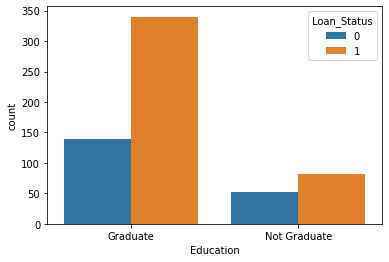

In [521]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

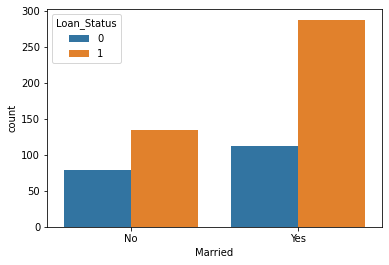

In [522]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

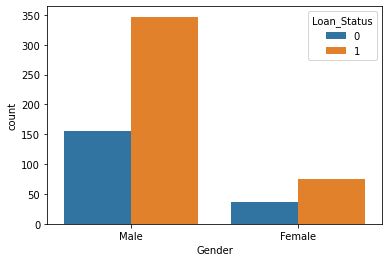

In [523]:
# Gender & Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

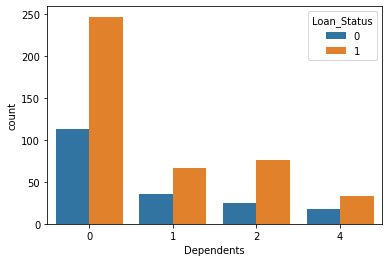

In [524]:
# Dependents & Loan Status
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_dataset)

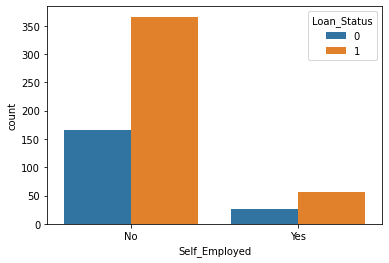

In [525]:
# Self_Employed & Loan Status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

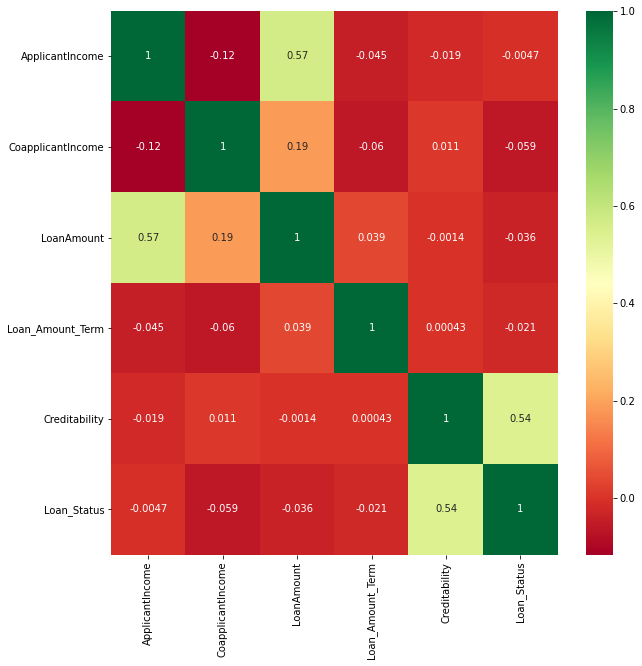

In [526]:
corrmat = loan_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(loan_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [527]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [528]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Creditability      614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [529]:
loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Creditability,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,LP001014,1,1,4,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [530]:
#drop the uniques loan id
loan_dataset.drop('Loan_ID', axis = 1, inplace = True)

In [531]:
loan_dataset.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Creditability,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,4,1,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [532]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [533]:
print(X)
print(Y)

     Gender  Married Dependents  ...  Loan_Amount_Term  Creditability  Property_Area
0         1        0          0  ...             360.0            1.0              2
1         1        1          1  ...             360.0            1.0              0
2         1        1          0  ...             360.0            1.0              2
3         1        1          0  ...             360.0            1.0              2
4         1        0          0  ...             360.0            1.0              2
..      ...      ...        ...  ...               ...            ...            ...
609       0        0          0  ...             360.0            1.0              0
610       1        1          4  ...             180.0            1.0              0
611       1        1          1  ...             360.0            1.0              2
612       1        1          2  ...             360.0            1.0              2
613       0        0          0  ...             360.0           

## Feature Importance

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top features for the dataset.

In [534]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [535]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.02207024 0.02039269 0.05763463 0.02023077 0.0217309  0.18380166
 0.11889894 0.17612584 0.05217993 0.27812087 0.04881352]


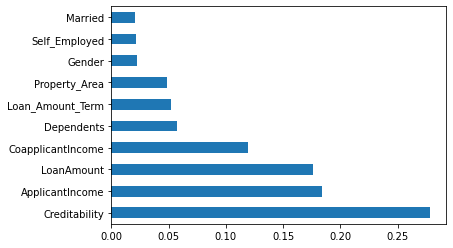

In [536]:
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


## Data Standardization

In [537]:
scaler=StandardScaler()

In [538]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [539]:
standardized_data=scaler.transform(X)

In [540]:
print(standardized_data)

[[ 0.47234264 -1.37208932 -0.6827291  ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.41173269
  -1.31851281]
 [ 0.47234264  0.72881553 -0.6827291  ...  0.27985054  0.41173269
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.96764754 ...  0.27985054  0.41173269
   1.22329839]
 [-2.11710719 -1.37208932 -0.6827291  ...  0.27985054 -2.42876026
  -0.04760721]]


In [541]:
X=standardized_data
Y=loan_dataset['Loan_Status']

In [542]:
print(X)
print(Y)

[[ 0.47234264 -1.37208932 -0.6827291  ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.41173269
  -1.31851281]
 [ 0.47234264  0.72881553 -0.6827291  ...  0.27985054  0.41173269
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.14245922 ...  0.27985054  0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.96764754 ...  0.27985054  0.41173269
   1.22329839]
 [-2.11710719 -1.37208932 -0.6827291  ...  0.27985054 -2.42876026
  -0.04760721]]
0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


Train Test Split

In [543]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [544]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (491, 11) (123, 11)


## Model Training

SVM Model

In [545]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)
y_predict4=tree.predict(X_test)

In [546]:
print("Evaluation Score:",f1_score(Y_test,y_predict4))
print("Accuracy:",accuracy_score(Y_test,y_predict4))
pd.crosstab(Y_test,y_predict4)

Evaluation Score: 0.8284023668639053
Accuracy: 0.7642276422764228


col_0,0,1
Loan_Status,,
0,24,14
1,15,70


Logistic Regression Model

In [547]:
from sklearn.linear_model import LogisticRegression

In [548]:
model = LogisticRegression()

In [549]:
model.fit(X_train, Y_train)
X_test_prediction1 = model.predict(X_test)

In [550]:
a1 = accuracy_score(X_test_prediction1,Y_test)
f1 = f1_score(X_test_prediction1,Y_test, average="macro")
p1 = precision_score(X_test_prediction1,Y_test, average="macro")
r1 = recall_score(X_test_prediction1,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
pd.crosstab(Y_test,X_test_prediction1)

accuracy score :  0.8048780487804879
f1 score :  0.7354838709677419


col_0,0,1
Loan_Status,,
0,18,20
1,4,81


Decision Tree Model

In [551]:
from sklearn.tree import DecisionTreeClassifier

In [552]:
tree=DecisionTreeClassifier()

In [553]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [554]:
X_test_prediction2= tree.predict(X_test)

In [555]:
a1 = accuracy_score(X_test_prediction2,Y_test)
f1 = f1_score(X_test_prediction2,Y_test, average="macro")
p1 = precision_score(X_test_prediction2,Y_test, average="macro")
r1 = recall_score(X_test_prediction2,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(Y_test,X_test_prediction2)

accuracy score :  0.7804878048780488
f1 score :  0.7545273117007909
precision score :  0.7684210526315789
recall score :  0.747008547008547


col_0,0,1
Loan_Status,,
0,28,10
1,17,68


RandomForest Model

In [556]:
from sklearn.ensemble import RandomForestClassifier

In [557]:
forest=RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [558]:
X_test_prediction_Rforest= forest.predict(X_test)

In [559]:
a1 = accuracy_score(X_test_prediction_Rforest,Y_test)
f1 = f1_score(X_test_prediction_Rforest,Y_test, average="macro")
p1 = precision_score(X_test_prediction_Rforest,Y_test, average="macro")
r1 = recall_score(X_test_prediction_Rforest,Y_test,average="macro")
print("accuracy score : ",a1)
print("f1 score : ",f1)
print("precision score : ",p1)
print("recall score : ",r1)
pd.crosstab(Y_test,X_test_prediction_Rforest)

accuracy score :  0.7967479674796748
f1 score :  0.7436004335862587
precision score :  0.7292569659442725
recall score :  0.7716434336023478


col_0,0,1
Loan_Status,,
0,21,17
1,8,77


Comment:From the above  Models i.e. SVM,Logistic Regression, Decision Tree and Random Forest the accuracy and f1 score of SVM is better then other Models

## Predictive Model

In [560]:
input_data=(1,	1,	1	,1,	0,	12841,	10968.0,	349.000000,	360.0	,1.0,	1	)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=classifier.predict(std_data)
print(prediction)

[1]


In [561]:
input_data=(1	,1,	4	,1,	0	,3036,	2504.0,	158.000000,	360.0	,0.0,	1	)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
prediction=classifier.predict(std_data)
print(prediction)

[0]
